Elias's Monte Carlo Pi Approximation project.



Using python, NumPy, and matplotlib, I have created a program to roughly estimate pi using the Monte Carlo method. This code utilizes a lot of for loops and stored arrays, as well as python's randomint function.

By specifying the size of a square, and fitting a unit circle inside it, randomly placing dots and dividing the dots inside of the circle by the total number of dots (as well as multiplying by 4) will give a rough estimation of pi. This calculation is done by using python's randomint function to give a x and y value within the square and then measuring the distance from the center. If this distance was less than the radius, it was counted as inside.

This estimation converges faster as you add more dots or increase the resolution (size) of the square. Calculations get intensive approaching 25,000,000 dots on a 5000 sized square, but at the current set rates, calculation shouldn't take more than 2.5 min.

Subroutine 1 allows the user to input a square size and number of dots to place on the square, then outputs the approximated value of pi. This was the first iteration of my program. It also handles higher numbers of dots better than either of the other subroutines, as there are no graphics or storage necessary, just pure input output.

Subroutine 2 allows the user to input a size for the square and a number of dots to place, then outputs an estimation of pi, as well as a visual graph of the dots placed and the circle and square. This is very resourse intensive so I recommend not surpassing 5,000 on the square size or 50,000 on the number of dots, although it will complete given enough time.

Subroutine 3 uses a fixed square size of 10,000 and incrementally calculates estimations of pi with numbers of dots, then outputs the results on a logarithmic graph. This allows you to see the convergance of the calculation. The graph is labeled by the number of dots in powers of 10 on the x-axis and the pi estimation on the y-axis. The graph also uses a python given value of pi to label the true accepted value of pi as a line.

I think I have used and approximated the Monte Carlo method very concisely, as well as graphing the convergance.
There is great variety and use in the code, and it helped me learn more about the documentation of Pymath, matplotlib, and Python.
There was some real trouble in trying to output the results of my for loops into an array or list to be graphed, but documentation scouring helped greatly.

In [2]:
def piest(total):
    import random
    x = 0
    y = 0
    inside = 0
    radius = 1 #radius of circle
    #dot calculation and pi estimation
    for dots in range(0,total):
        #generates coordinates for a random point in a square with a side 2
        x = random.uniform(-radius, radius) 
        y = random.uniform(-radius, radius) 
        if (x**2+y**2)**0.5 <= 1: #if the distance is within a circle with radius one
            inside += 1
        continue
    pi = 4*(inside/total) #pi is 4*the radio between the inside and total dots
    return pi

In [6]:
#user input section
total=int(input("How many darts?"))
print("Pi Estimation:" + str(piest(total)))

How many darts? 1000000


Pi Estimation:3.142124


How many darts? 10000


<Figure size 2124x2124 with 0 Axes>

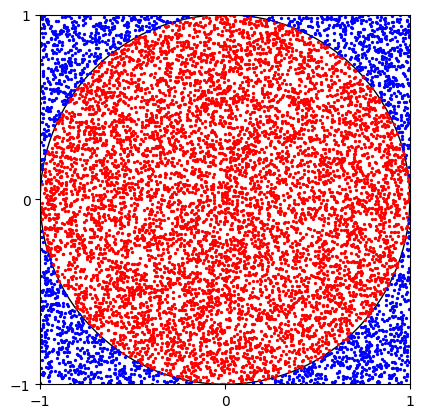

Inside: 7863
Total: 10000
Pi Estimation:3.1452


In [1]:
#dependancies
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
import random
inside = 0
#user input section
total=int(input("How many darts?"))
radius=1
#graph creation section (plt.ion() changes the graph to interactive, allowing the repeated placement of dots to update the graph)
plt.ion()
fig = plt.figure(figsize=(3.54,3.54),dpi=600)
fig, ax = plt.subplots()
ax.set_xlim((-radius, radius))
ax.set_ylim((-radius, radius))
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
center = (0,0)
circle=Circle(center,radius, fill=False)
#setting axis equal so as to not distort circle
ax.set_aspect('equal')
#calculating dot placement
for dots in range(0,total):
    x = random.uniform(-radius, radius)
    y = random.uniform(-radius, radius)
    distance = (x**2+y**2)**0.5
    if distance <= radius:
        inside += 1
        plt.plot(x, y, '.', color='red',ms=2.75)
    else:
        plt.plot(x, y, '.', color='blue',ms=2.75)
    continue
#adding circle to graph and displaying
ax.add_patch(circle)
plt.savefig('visulization.png', bbox_inches='tight')
plt.show()
#calculate pi estimation and print
pi = 4*((inside/total))
print("Inside:",inside)
print("Total:",total)
print("Pi Estimation:" + str(pi))

# Converging upon real value of pi

In [8]:
#generating array of up to 10^10 estimated pies
#dependencies
import random
import matplotlib.pyplot as plt
import numpy as np
#initilizing variables and arrays
inside = 0
pi=0
totals = []
pies = []
radius = 1
for n in range(1,9+1): #powers of 10 for the numbers of dots (+1 to fix range mismatch)
    for total in [10**n]: 
    #appending input and output of calcuation to arrays
        totals.append(total)
        pi = piest(total)
        pies.append(pi)
        print("POWER DONE! Average Pi of","10^"+str(n),"darts","is",pi) #debug statement, shows when power of 10 is done
        continue
    continue

POWER DONE! Average Pi of 10^1 darts is 3.2
POWER DONE! Average Pi of 10^2 darts is 2.96
POWER DONE! Average Pi of 10^3 darts is 3.088
POWER DONE! Average Pi of 10^4 darts is 3.15
POWER DONE! Average Pi of 10^5 darts is 3.15324
POWER DONE! Average Pi of 10^6 darts is 3.14104
POWER DONE! Average Pi of 10^7 darts is 3.1414432
POWER DONE! Average Pi of 10^8 darts is 3.14137428
POWER DONE! Average Pi of 10^9 darts is 3.141582624


In [9]:
#printing array for data visualization
print("Darts:", totals)
print("Pies", pies)

Darts: [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
Pies [3.2, 2.96, 3.088, 3.15, 3.15324, 3.14104, 3.1414432, 3.14137428, 3.141582624]


<Figure size 354x354 with 0 Axes>

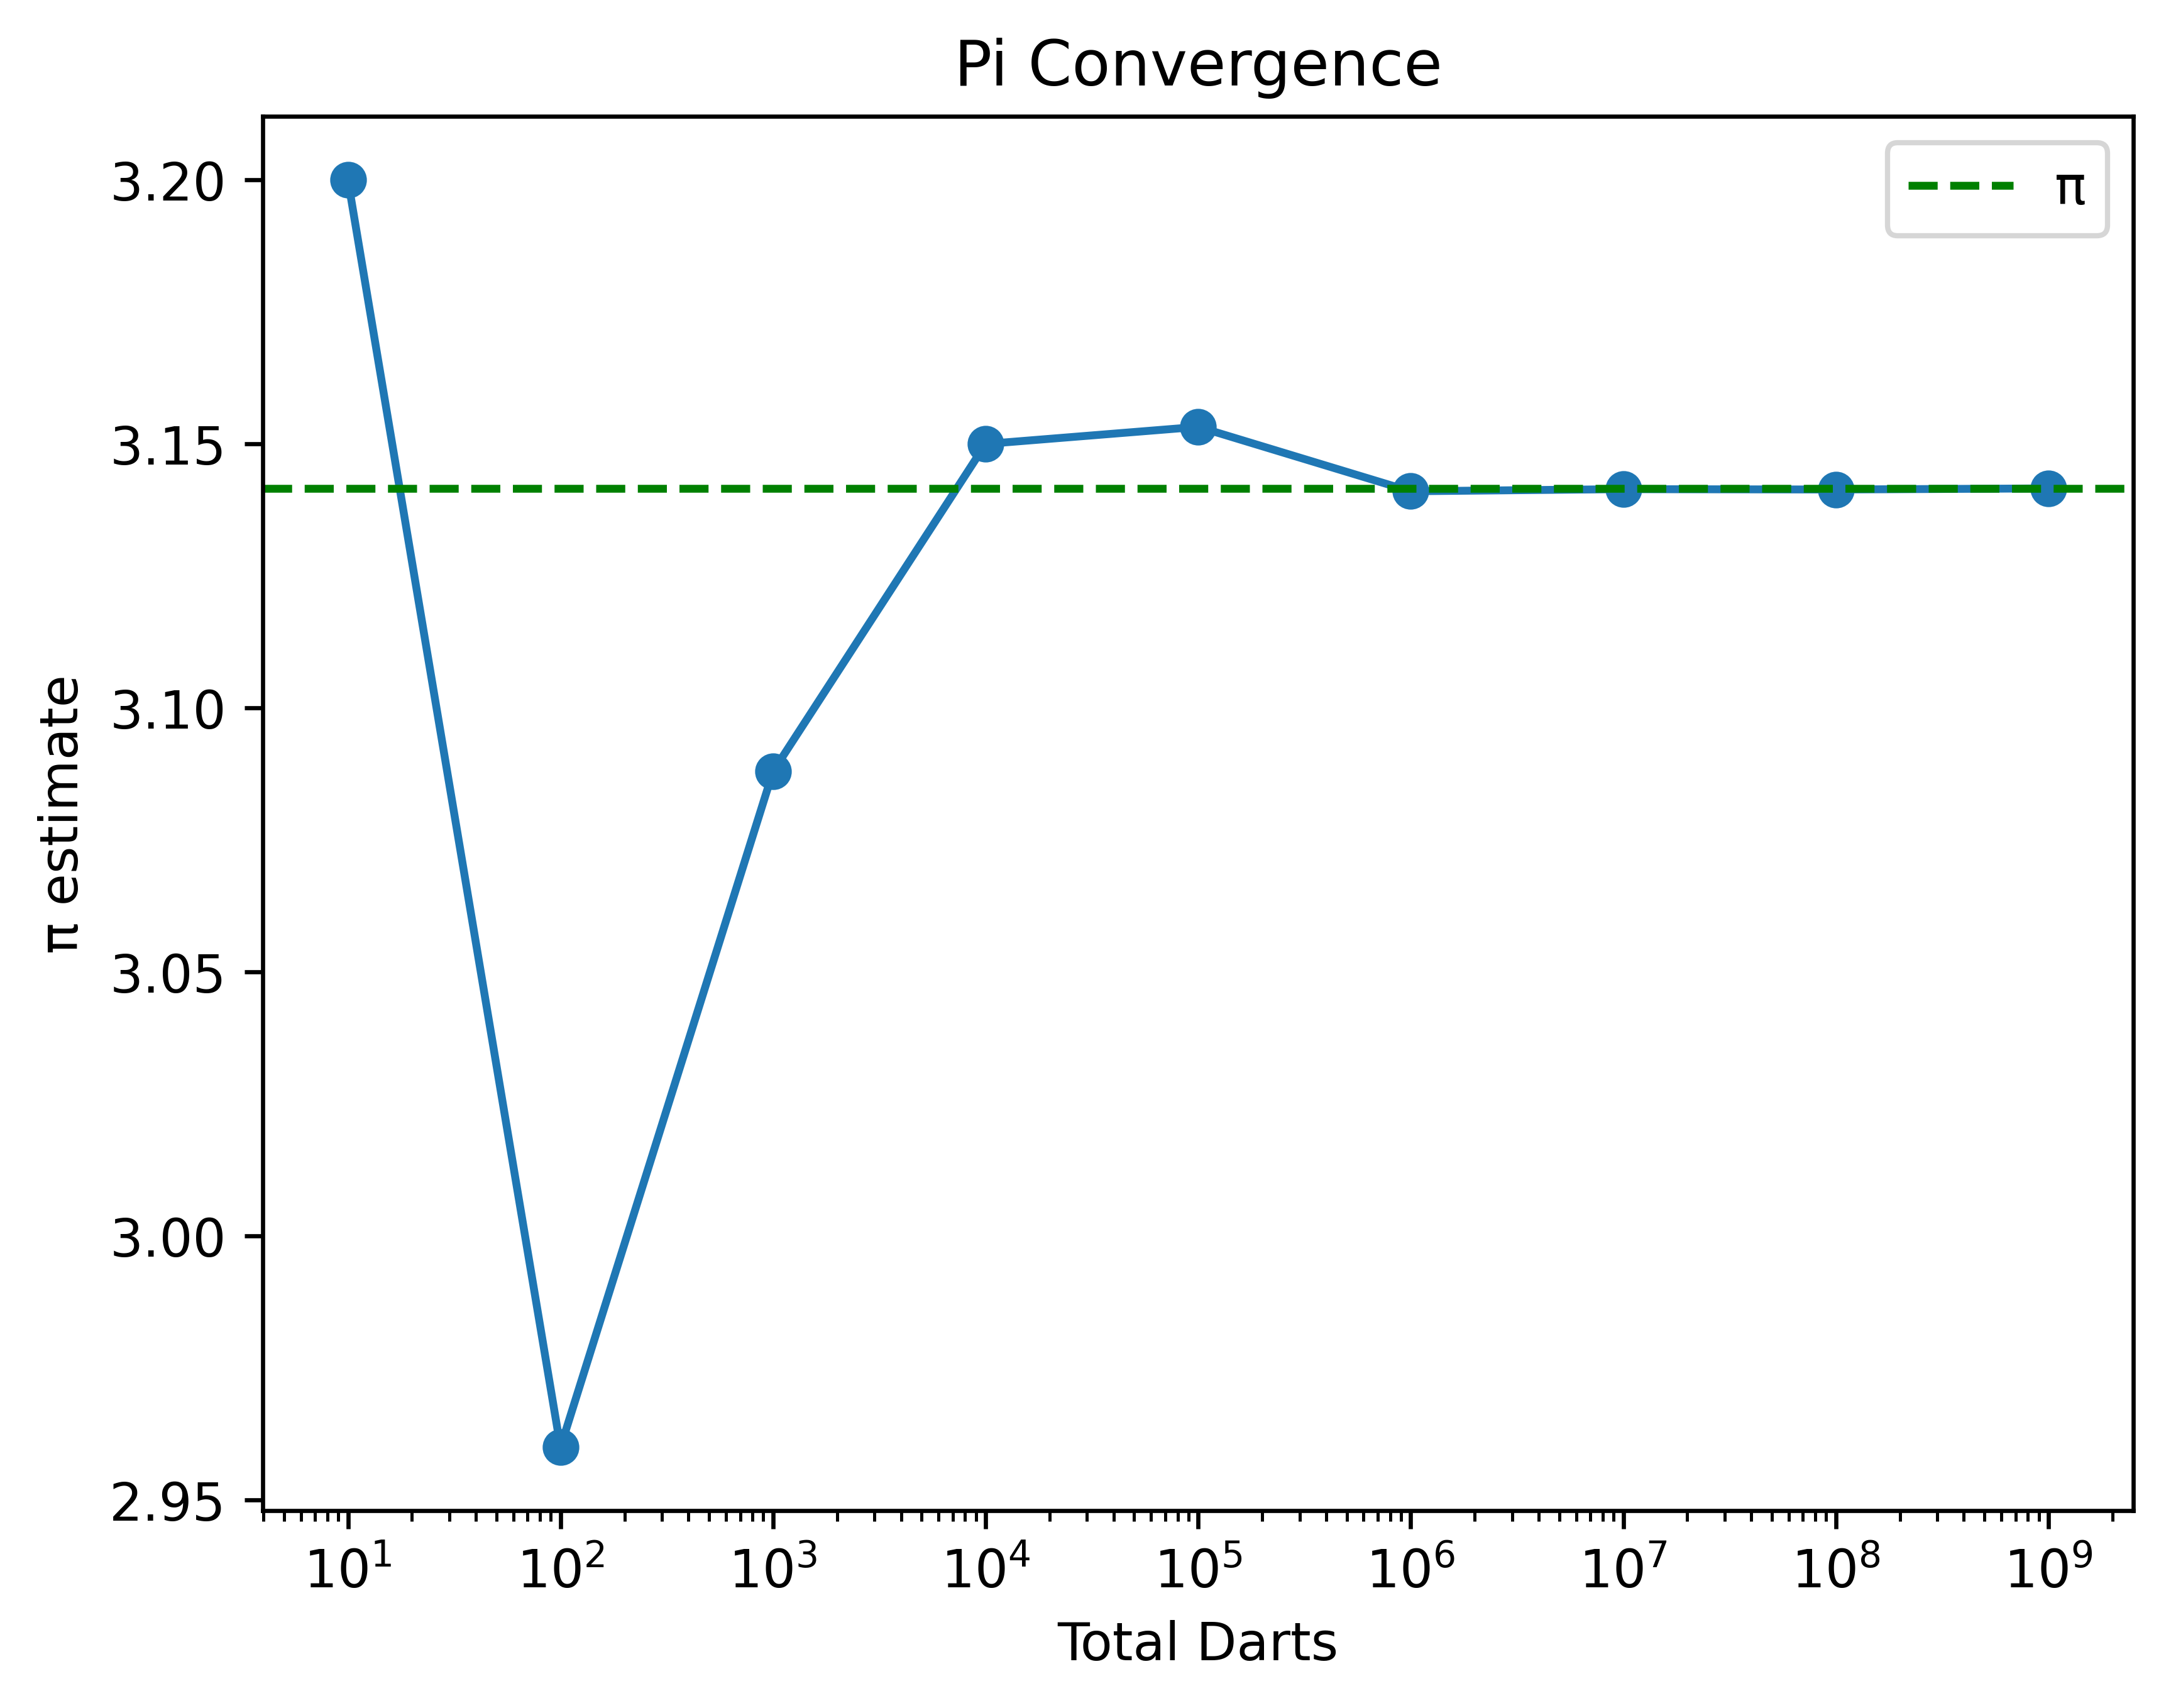

In [31]:
#graphing segment
fig = plt.figure(figsize=(3.54,3.54))
fig, ax = plt.subplots(dpi=600)
plt.plot(totals, pies, 'o-')
ax.axhline(np.pi, color='g', linestyle='--', label='\u03C0')
ax.set_xscale('log')
ax.set_xlabel('Total Darts')
ax.set_ylabel('\u03C0 estimate')
ax.set_title('Pi Convergence')
ax.legend()
plt.savefig('piconverge.png', bbox_inches='tight')
plt.show()

Error Values

In [15]:
#dependencies
import numpy as np
errors=[]
for i in range(len(pies)):
    errors.append(abs(1-(pies[i]/np.pi)))

In [16]:
#printing array for data visualization
print("dots: ", totals)
print("error: ", errors)

dots:  [10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
error:  [0.018591635788130167, 0.05780273689597959, 0.01705907146445429, 0.0026761414789406857, 0.003707465510176089, 0.00017591510126613308, 4.757255515686065e-05, 6.951047251257947e-05, 3.1925175854041754e-06]


<Figure size 354x354 with 0 Axes>

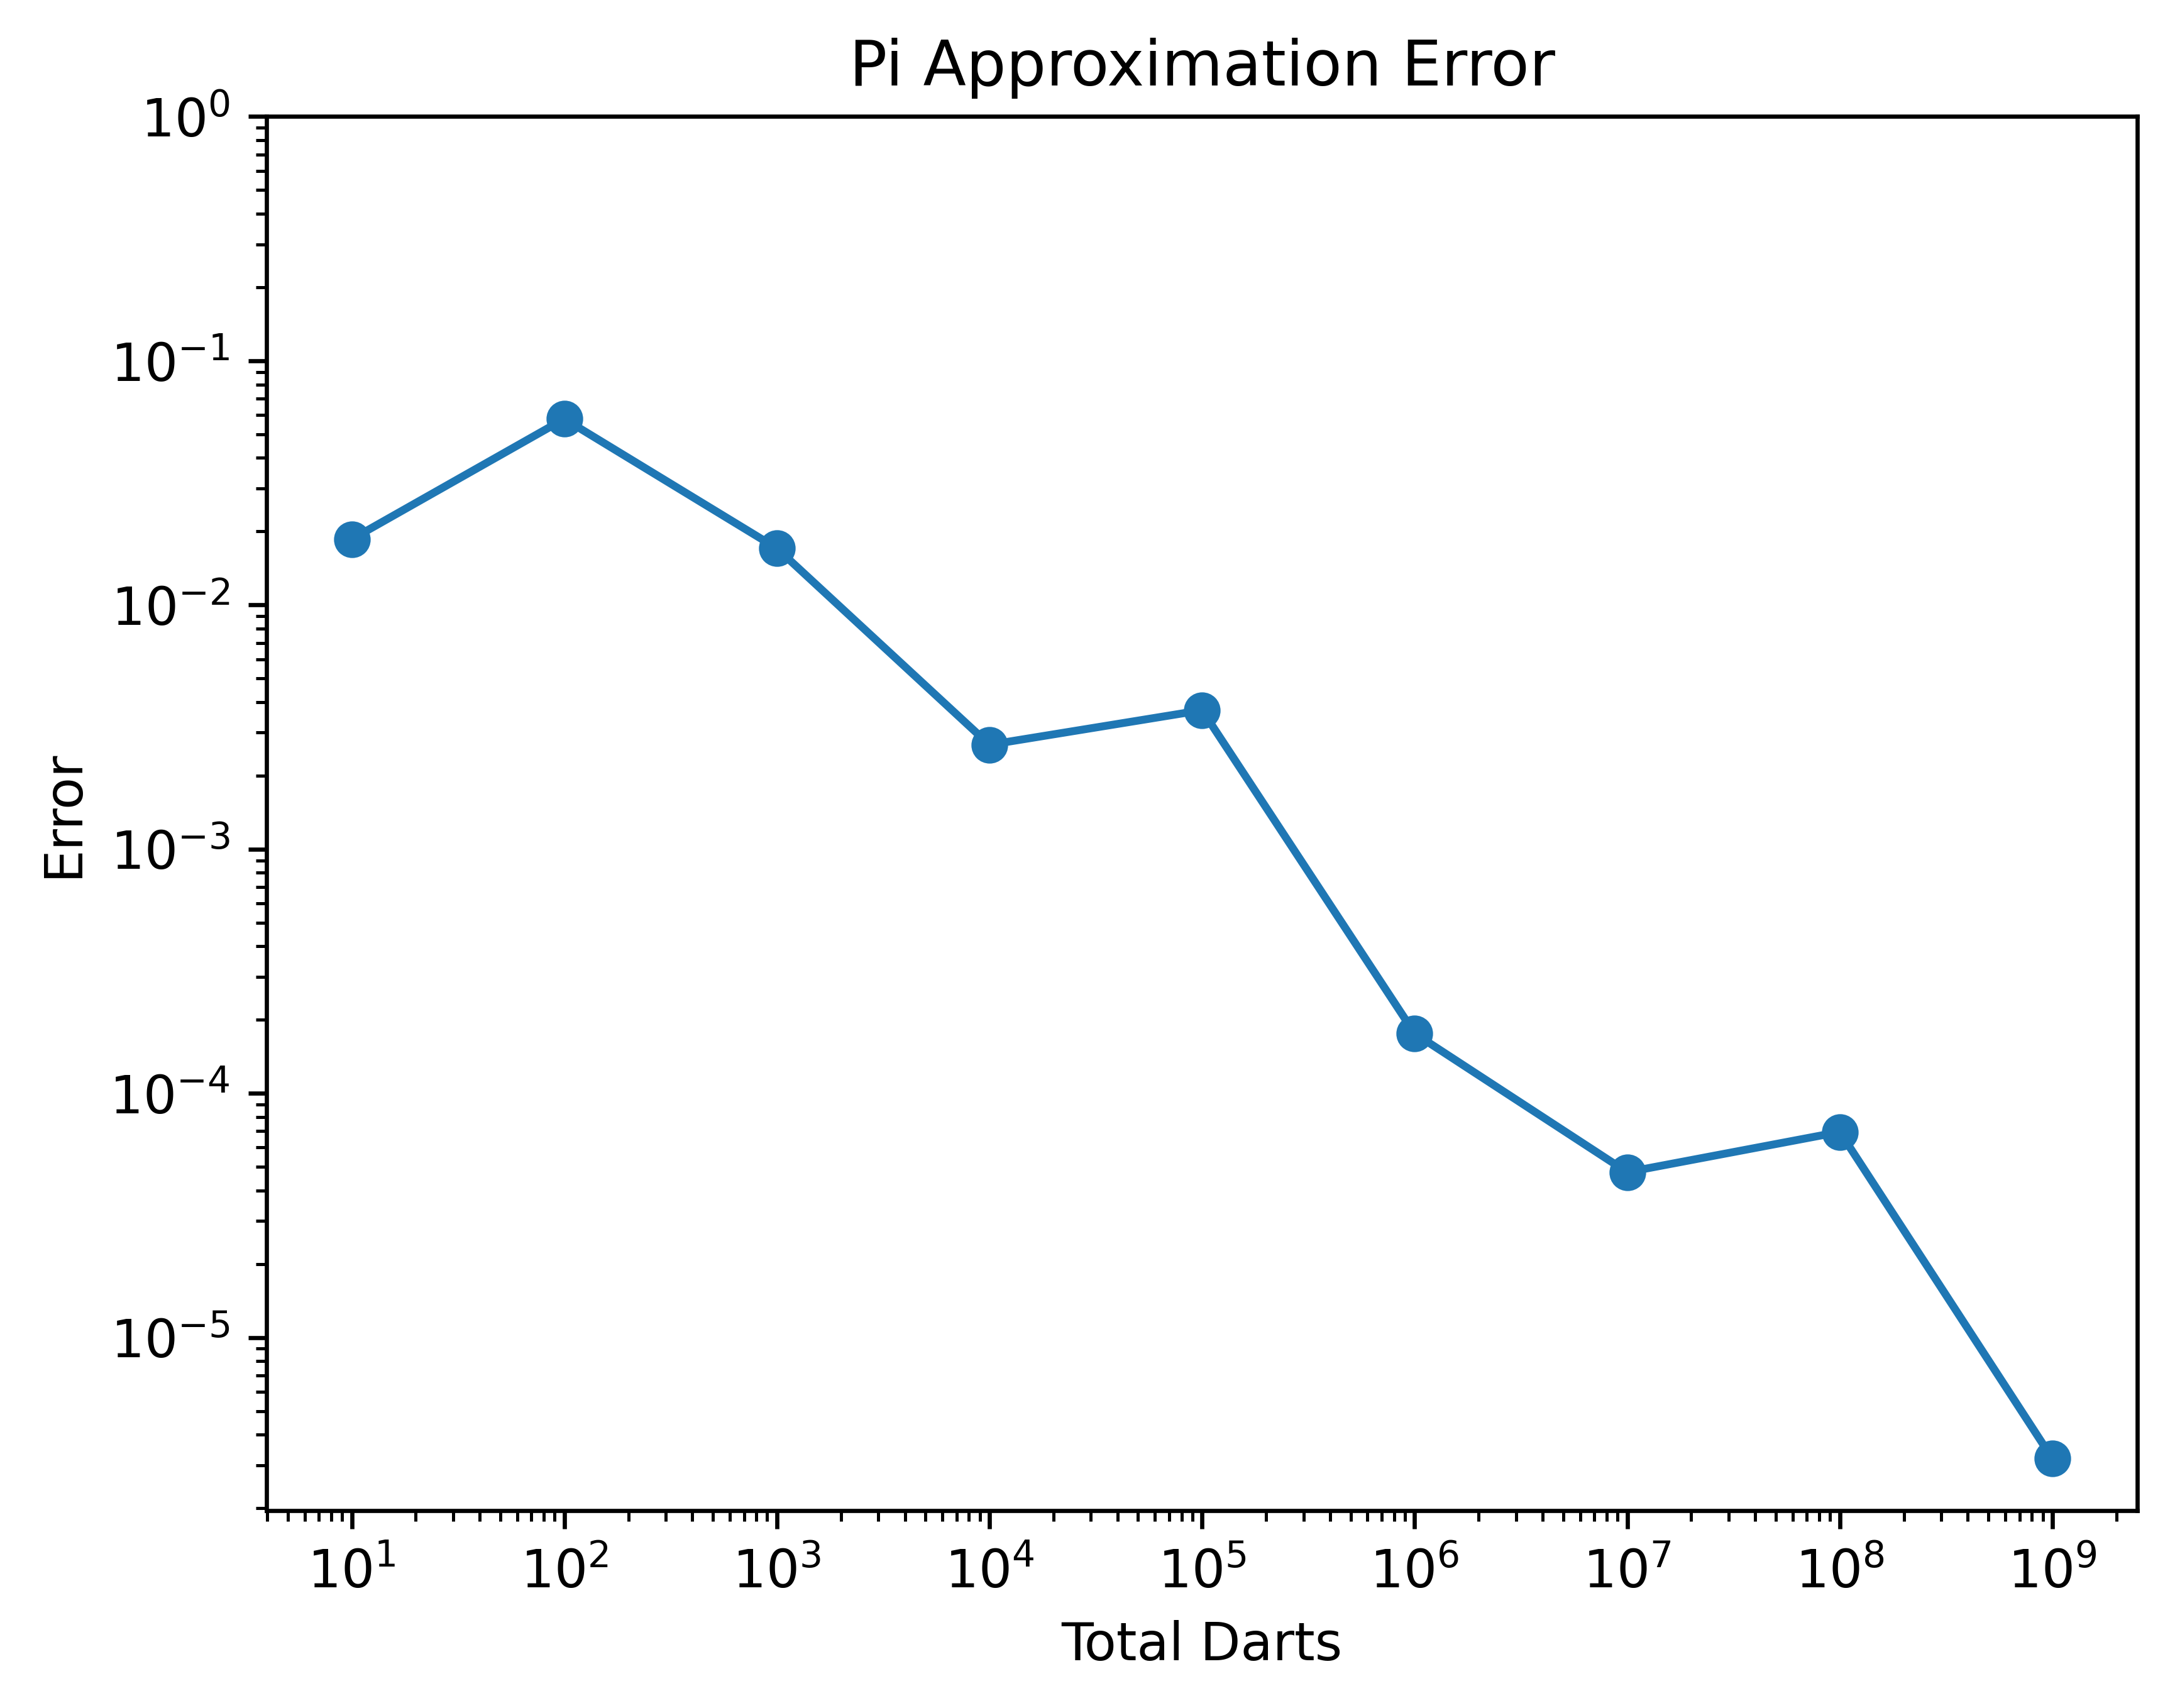

In [30]:
#graphing segment
fig = plt.figure(figsize=(3.54,3.54))
fig, ax = plt.subplots(dpi=600)
ax.plot(totals, errors, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(top=1)
ax.set_xlabel('Total Darts')
ax.set_ylabel('Error')
ax.set_title('Pi Approximation Error')
plt.savefig('pierr.png', bbox_inches='tight')
plt.show()

### Average values of pi per power
Average for 100 iterations of approximation (6th power of 10, 1 million darts)

In [3]:
#dependencies
import random
import matplotlib.pyplot as plt
import numpy as np
#initilizing variables and arrays
avgtotals = []
avgpies = []
radius = 1
for n in range(1,6+1): #powers of 10 for the numbers of dots
    for total in [10**n]: 
        piecount=0
        for i in range(100): #run the approximation n times
            piecount += (piest(total))
            print("10^"+str(n), "iteration",i) #debug statement, shows what iteration of code is on
        avgpie = (piecount/100) #calculate average of approximation
        print("POWER DONE! Average Pi of",total,"darts","is",avgpie) #debug statement, shows when power of 10 is done
        avgpies.append(avgpie) #append to list
        avgtotals.append(total)
        continue
    continue

10^1 iteration 0
10^1 iteration 1
10^1 iteration 2
10^1 iteration 3
10^1 iteration 4
10^1 iteration 5
10^1 iteration 6
10^1 iteration 7
10^1 iteration 8
10^1 iteration 9
10^1 iteration 10
10^1 iteration 11
10^1 iteration 12
10^1 iteration 13
10^1 iteration 14
10^1 iteration 15
10^1 iteration 16
10^1 iteration 17
10^1 iteration 18
10^1 iteration 19
10^1 iteration 20
10^1 iteration 21
10^1 iteration 22
10^1 iteration 23
10^1 iteration 24
10^1 iteration 25
10^1 iteration 26
10^1 iteration 27
10^1 iteration 28
10^1 iteration 29
10^1 iteration 30
10^1 iteration 31
10^1 iteration 32
10^1 iteration 33
10^1 iteration 34
10^1 iteration 35
10^1 iteration 36
10^1 iteration 37
10^1 iteration 38
10^1 iteration 39
10^1 iteration 40
10^1 iteration 41
10^1 iteration 42
10^1 iteration 43
10^1 iteration 44
10^1 iteration 45
10^1 iteration 46
10^1 iteration 47
10^1 iteration 48
10^1 iteration 49
10^1 iteration 50
10^1 iteration 51
10^1 iteration 52
10^1 iteration 53
10^1 iteration 54
10^1 iteration 55
10

In [4]:
#printing array for data visualization
print('Totals:', avgtotals,'* 100')
print('Average Pies:', avgpies)

Totals: [10, 100, 1000, 10000, 100000, 1000000] * 100
Average Pies: [3.075999999999998, 3.1308000000000002, 3.147920000000001, 3.1414520000000015, 3.141421599999999, 3.1415626800000007]


<Figure size 2124x2124 with 0 Axes>

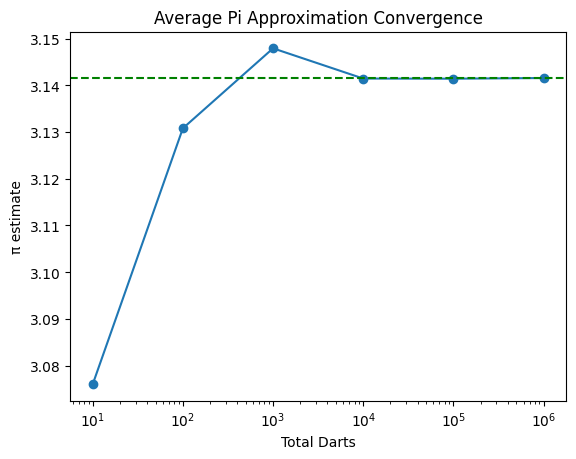

In [5]:
#graphing segment
fig = plt.figure(figsize=(3.54,3.54),dpi=600)
fig, ax = plt.subplots()
ax.plot(avgtotals, avgpies, 'o-')
ax.axhline(np.pi, color='g', linestyle='--', label='\u03C0')
ax.set_xscale('log')
ax.set_xlabel('Total Darts')
ax.set_ylabel('\u03C0 estimate')
ax.set_title('Average Pi Approximation Convergence')
plt.savefig('avgpi.png', bbox_inches='tight')
plt.show()

Avg Errors

In [6]:
avgerrors=[]
for i in range(len(avgpies)):
    avgerrors.append(abs(1-(avgpies[i]/np.pi)))

In [7]:
#printing array for data analysis
print(avgtotals)
print(avgerrors)

[10, 100, 1000, 10000, 100000, 1000000]
[0.02087879009866056, 0.003435408335788037, 0.002014056915678575, 4.477142815795254e-05, 5.444804869880748e-05, 9.54088995530622e-06]


<Figure size 2124x2124 with 0 Axes>

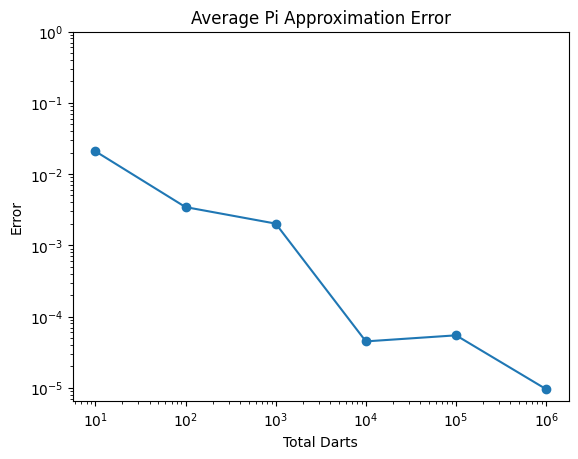

In [8]:
#graphing segment
fig = plt.figure(figsize=(3.54,3.54),dpi=600)
fig, ax = plt.subplots()
ax.plot(avgtotals, avgerrors, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(top=1)
ax.set_xlabel('Total Darts')
ax.set_ylabel('Error')
ax.set_title('Average Pi Approximation Error')
plt.savefig('avgpierr.png', bbox_inches='tight')
plt.show()